In [15]:
import scipy.io as sio  
import numpy as np   
import pandas as pd
from matplotlib.ticker import FuncFormatter 
import matplotlib.pyplot as plt  
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### Loading high-frequency data of Amazon stock on 11 Nov 2014

In [16]:
data = sio.loadmat('AMZN_20141111.mat')

In [17]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

### Data description

In [27]:
# Apply provided formular to calculate midprice, microprice and spread
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

MidP = pd.Series(midprice).to_frame().describe()
MicP = pd.Series(microprice).to_frame().describe()
S = pd.Series(spread).to_frame().describe()

Sum = pd.concat([MidP, MicP, S], axis=1)
Sum.columns = ['MidPrice', 'MicroPrice','Spread']
Sum

,MidPrice,MicroPrice,Spread
count,234000.000000,234000.000000,234000.000000
mean,309.906429,309.908258,0.092936
std,1.868365,1.869094,0.058797
min,303.655000,303.557778,0.010000
25%,309.535000,309.533830,0.060000
50%,310.305000,310.309075,0.080000
75%,310.935000,310.956355,0.120000
max,312.360000,312.375392,1.130000


### Plotting

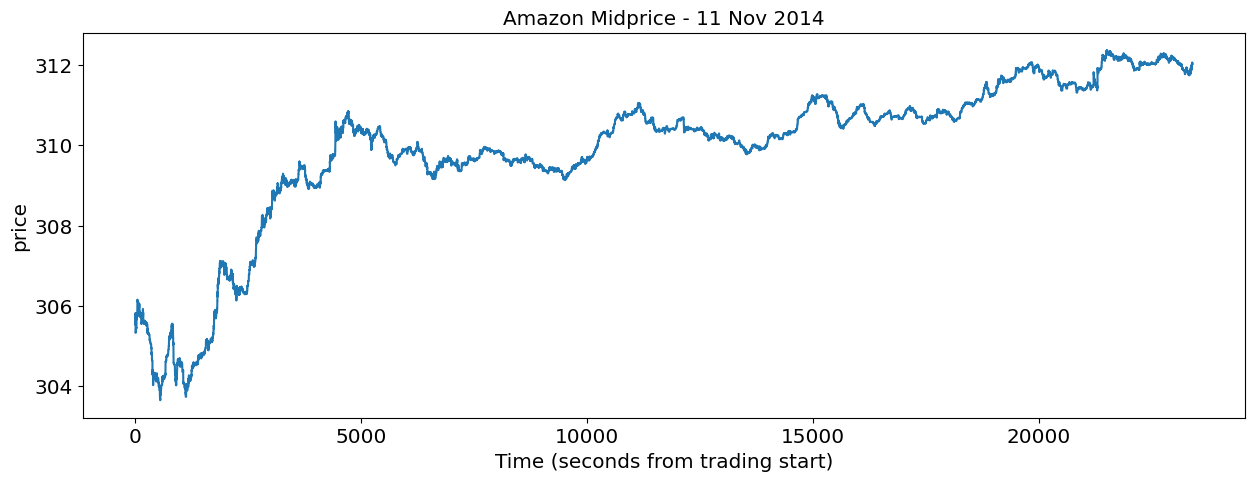

In [6]:
plt.plot(t, midprice)
plt.title('Amazon Midprice - 11 Nov 2014')
plt.ylabel('price')
plt.xlabel('Time (seconds from trading start)')
plt.show()

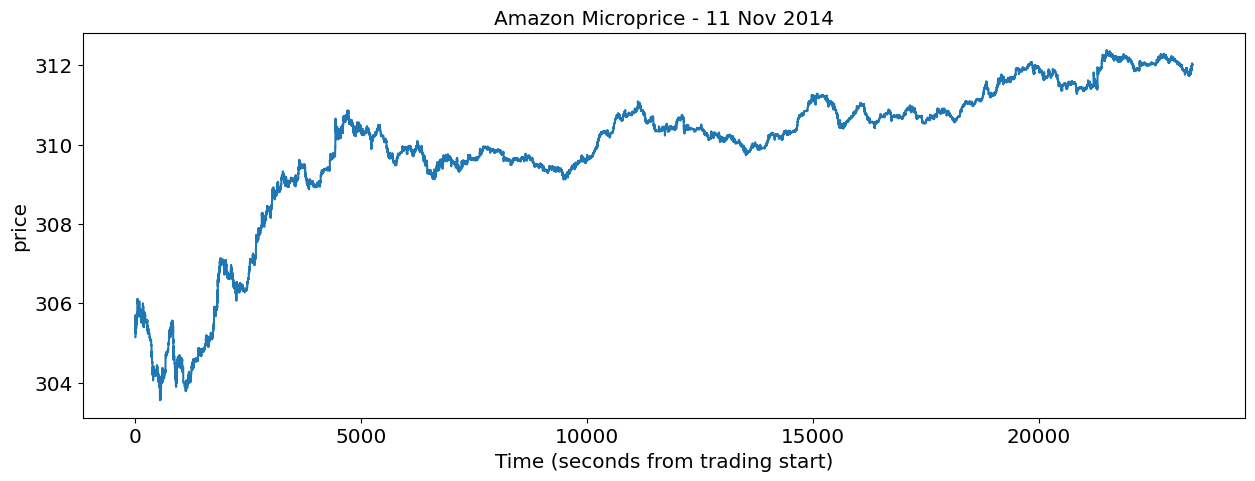

In [7]:
plt.plot(t, microprice)
plt.title('Amazon Microprice - 11 Nov 2014')
plt.ylabel('price')
plt.xlabel('Time (seconds from trading start)')
plt.show()

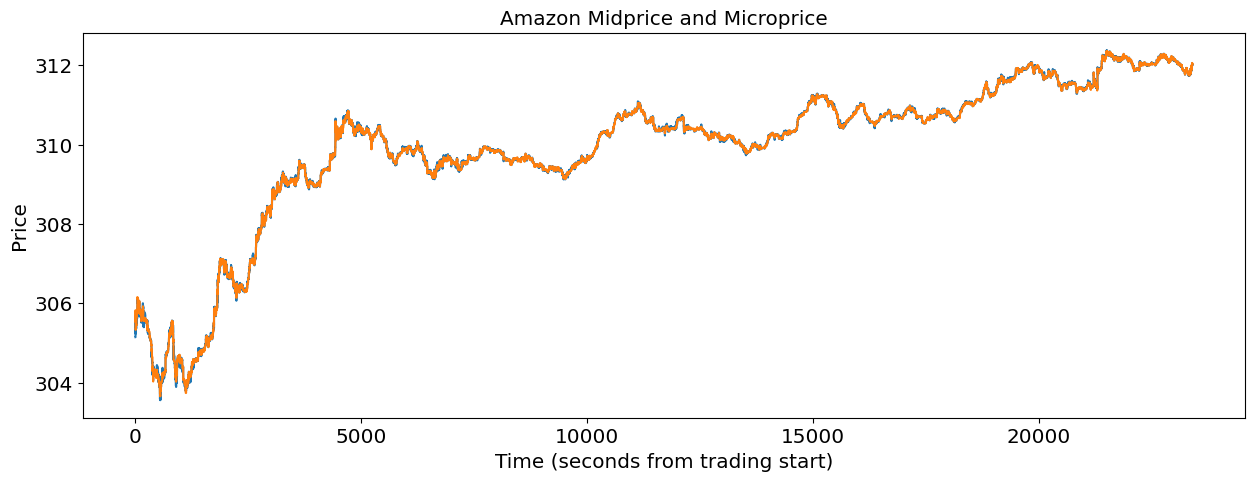

In [8]:
plt.plot(t, microprice)
plt.plot(t, midprice)
plt.title('Amazon Midprice and Microprice')
plt.ylabel('Price')
plt.xlabel('Time (seconds from trading start)')
plt.show()

#### Difference between Microprice and Midprice 

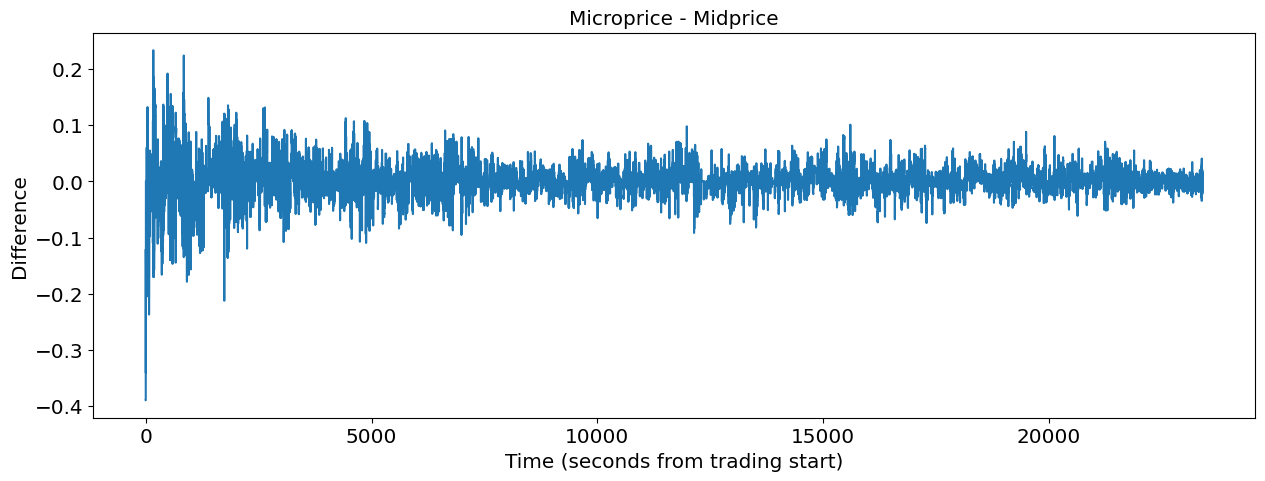

In [9]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('Difference')
plt.xlabel('Time (seconds from trading start)')
plt.show()

#### Spread 

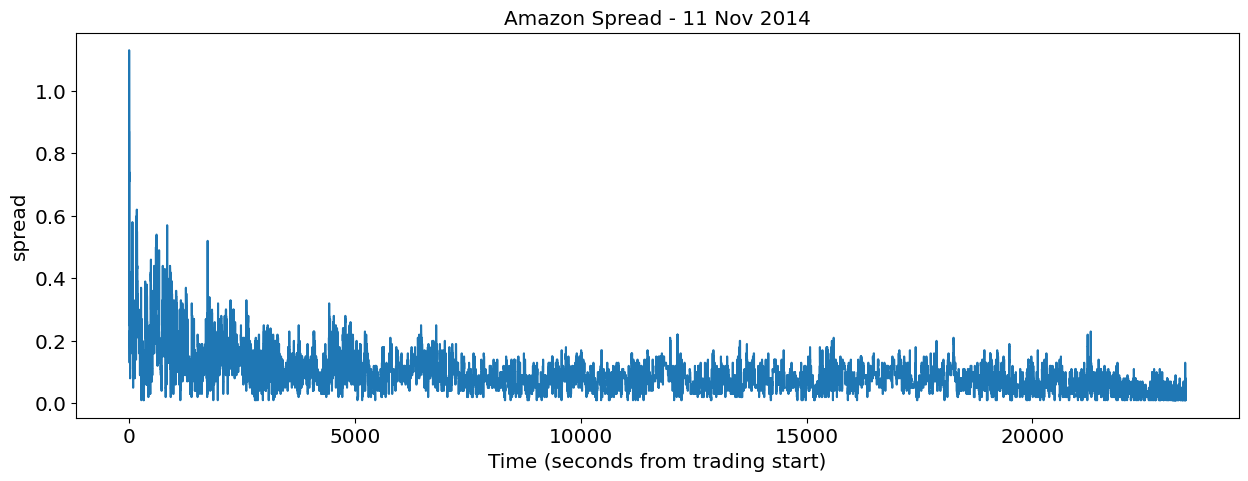

In [10]:
plt.plot(t,spread)
plt.title('Amazon Spread - 11 Nov 2014')
plt.ylabel('spread')
plt.xlabel('Time (seconds from trading start)')
plt.show()

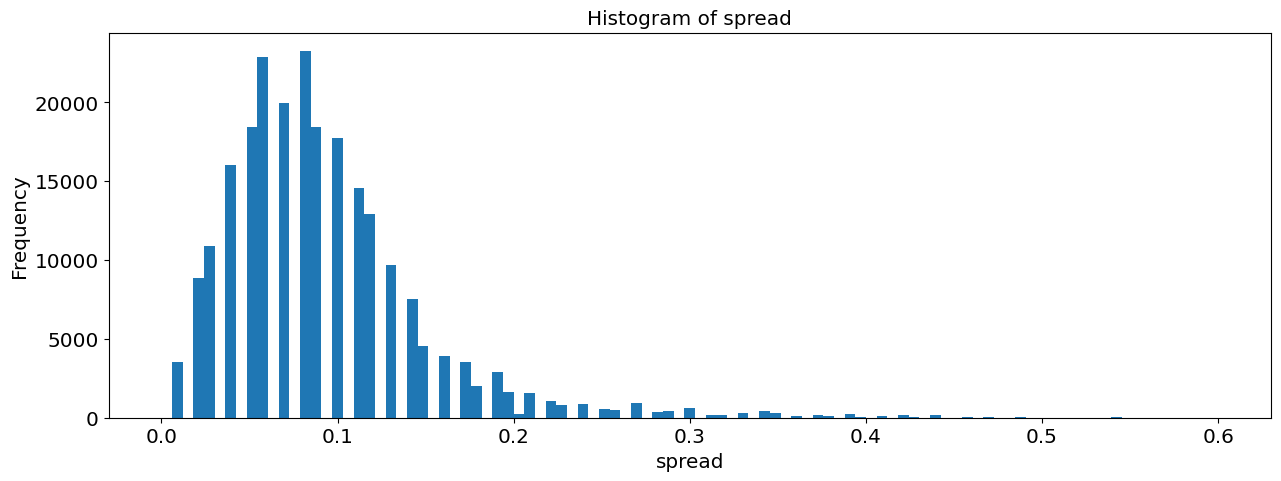

In [11]:
#plt.hist(spread,bins=[0.1,0.2,0.3], width=0.01,align='mid')
plt.hist(spread, bins=np.linspace(0, 0.6, num=100)) 
plt.title("Histogram of spread")
plt.xlabel(r'spread')
plt.ylabel('Frequency')
plt.show()

### Limit Order Imbalance

In [12]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

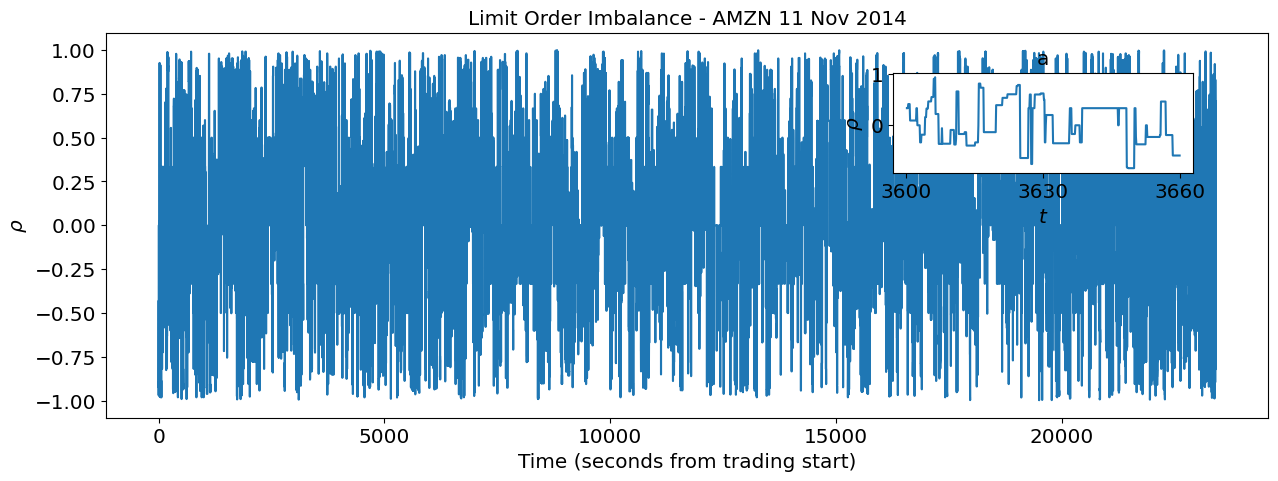

In [13]:
plt.plot(t, rho)
plt.title('Limit Order Imbalance - AMZN 11 Nov 2014')
plt.ylabel(r'$\rho$')
plt.xlabel('Time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

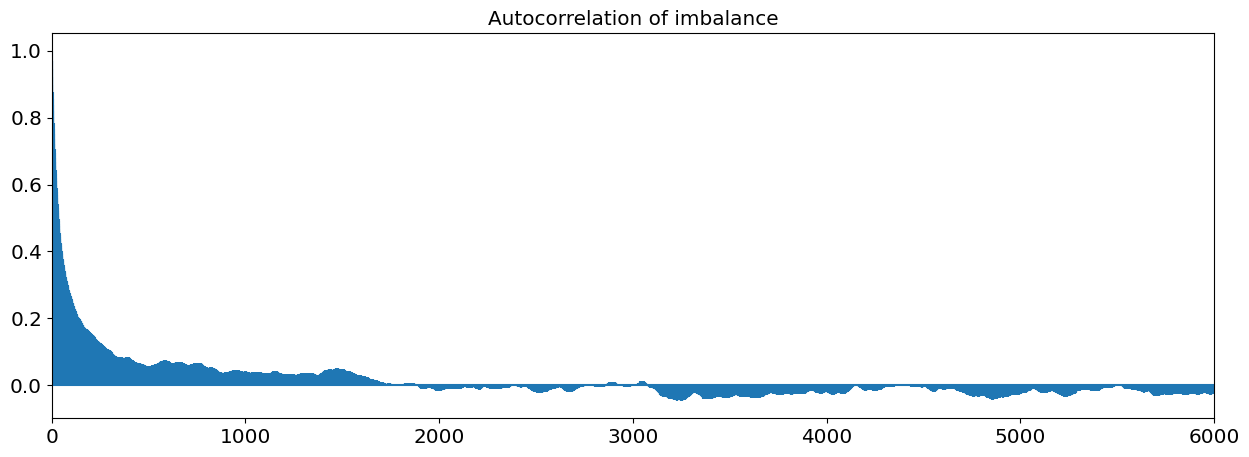

In [14]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

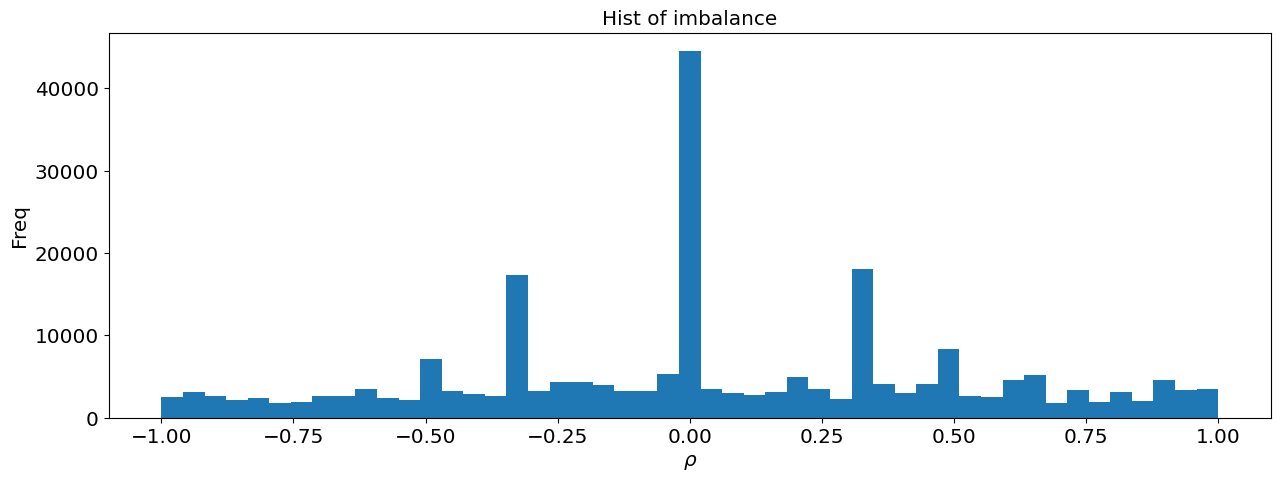

In [15]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

In [16]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

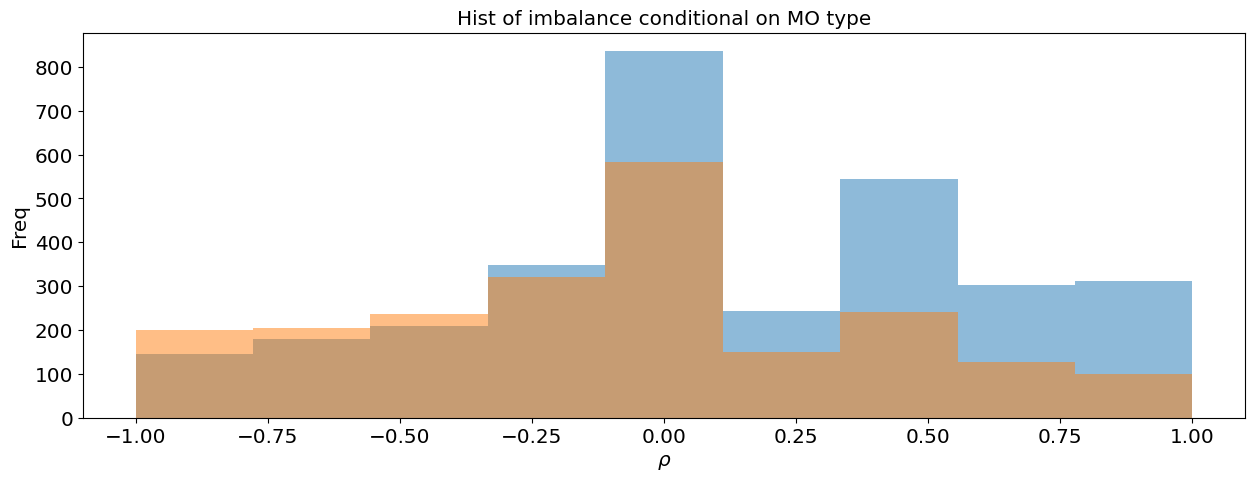

In [17]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Hist of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()